# Libraries

In [1]:
# project_path = 'put_your_project_path_here'
project_path = '../../'

In [2]:
import sys
sys.path.insert(1, project_path)   # caution: path[0] is reserved for script path (or '' in REPL)

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training
from sklearn import linear_model
from sklearn import metrics
import copy
from mv_utils import lasso_rank, SVM_RBF_eval
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Loading Dataset

In [3]:
X, y, ID = data_loader.load_dataset(X_path='../../data/2023-11-08/feature_mfcc_34_delta_delta_nfft_4096.csv', 
                                    y_path='../../data/2023-11-08/y_labels_feature_34_mfcc_delta_delta_nfft_4096.csv',
                                    ID_path='../../data/2023-11-08/IDs_feature_mfcc_34_delta_delta_nfft_4096.csv') 

data loaded in 0.07801699638366699ms
          0         1         2         3         4         5         6  \
0  0.327805 -0.464719 -0.540320 -0.983787 -1.276392 -0.517576 -0.059207   
1 -0.483202 -0.287426  0.073267 -0.259939 -1.043461  0.220426 -0.243781   
2 -0.982079  1.092156 -0.237941 -0.002997 -0.934974  0.313563  0.708375   
3  0.968642 -1.604765 -0.123183 -0.789169 -1.783557 -0.222486 -0.352760   
4  0.548607 -1.485735 -0.842989 -0.959707 -1.563772 -0.373401 -0.273213   

          7         8         9  ...       296       297       298       299  \
0 -1.325718 -0.865250 -1.400271  ... -0.000500  0.245232  0.467592  0.179897   
1 -0.745799 -0.558315 -0.667095  ...  0.081401 -0.156604  0.054227  1.335473   
2  0.392641 -0.112142 -0.675854  ...  1.159202 -0.281807  0.370446  0.969862   
3 -1.354752 -0.871037 -0.944073  ... -0.582348  1.606737 -1.213523  0.283672   
4 -1.374351 -0.530736 -0.333489  ... -0.312877 -1.016252 -0.713702  0.537837   

        300       301       302

# Backward step selection

In [4]:
def back_step_selection_svm_rbf(X,y,feature_ind, ID):
# BACK_STEP_SELECTION Automatic procedure of feature selection

#basic version
   acc_mu_curr,_,_,_,_ = SVM_RBF_eval(X,y,feature_ind, ID)
   some_feature_droped = True
   while (some_feature_droped):
      print('NEW ROUND')
      acc_up = -np.ones_like(feature_ind).astype(np.double)
      for i in range(len(feature_ind)):
         cur_inds = np.setdiff1d(feature_ind,feature_ind[i])
         acc_mu,_,_,_,_ = SVM_RBF_eval(X,y,cur_inds, ID)                  
         
         if (acc_mu>=acc_mu_curr):
            acc_up[i] = acc_mu-acc_mu_curr
            print(f'Iter #{i}: {acc_mu:.3f} <-> {acc_mu_curr:.3f}')
            
      m_val = np.max(acc_up)
      m_ind = np.argmax(acc_up)
      
      if (m_val>=0):
         print(f'Withdraw feature #{m_ind}, added accracy {m_val}')
         feature_ind = np.setdiff1d(feature_ind,feature_ind[m_ind]);
         some_feature_droped = True       
         # new basic version
         acc_mu_curr,_,_,y_pred,y_true = SVM_RBF_eval(X,y,feature_ind, ID)
      else:
         acc_final = acc_mu_curr
         some_feature_droped = False

   return acc_final, feature_ind,y_pred,y_true

## Full cycle of feature selection

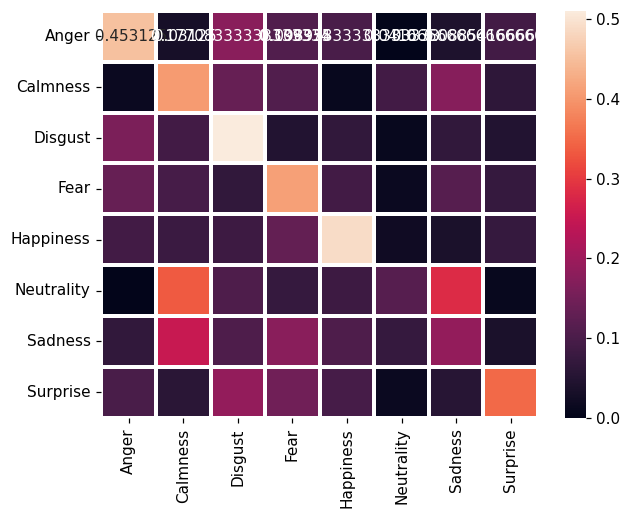

Saving confusion matrix with name:  ../../data/svm/confusion_matrix_SVM_rbf_happy.jpg
We need to compute effective number of features


  0%|          | 1/306 [00:05<26:56,  5.30s/it]

Iter =  1  UAR = 0.5000


  3%|▎         | 9/306 [00:58<33:54,  6.85s/it]

Iter =  9  UAR = 0.5052


  4%|▍         | 12/306 [01:20<35:12,  7.18s/it]

Iter =  12  UAR = 0.5078


  4%|▍         | 13/306 [01:27<34:55,  7.15s/it]

Iter =  13  UAR = 0.5960


  5%|▍         | 14/306 [01:34<34:46,  7.15s/it]

Iter =  14  UAR = 0.6023


  5%|▍         | 15/306 [01:41<34:51,  7.19s/it]

Iter =  15  UAR = 0.6324


  7%|▋         | 21/306 [02:24<34:10,  7.20s/it]

Iter =  21  UAR = 0.6365


  7%|▋         | 22/306 [02:32<34:23,  7.27s/it]

Iter =  22  UAR = 0.6507


  8%|▊         | 23/306 [02:39<34:35,  7.33s/it]

Iter =  23  UAR = 0.6596


100%|██████████| 306/306 [1:31:55<00:00, 18.03s/it]


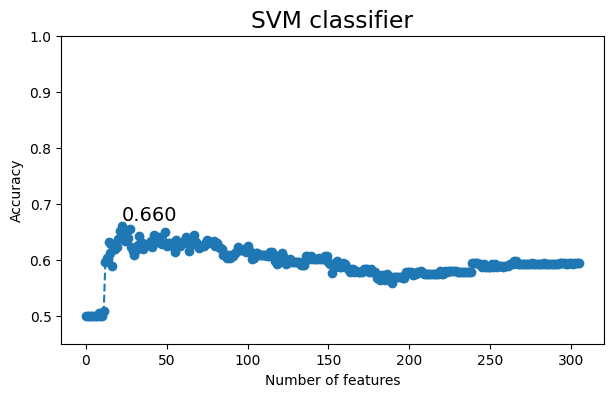

auc_best = 0.65959821
best auc (SVM) =  0.6595982142857143 Number of features =  22
NEW ROUND
Iter #10: 0.671 <-> 0.660
Iter #15: 0.679 <-> 0.660
Iter #16: 0.660 <-> 0.660
Iter #18: 0.671 <-> 0.660
Withdraw feature #15, added accracy 0.0189732142857143
NEW ROUND
Iter #3: 0.679 <-> 0.679
Iter #12: 0.687 <-> 0.679
Withdraw feature #12, added accracy 0.008556547619047561
NEW ROUND


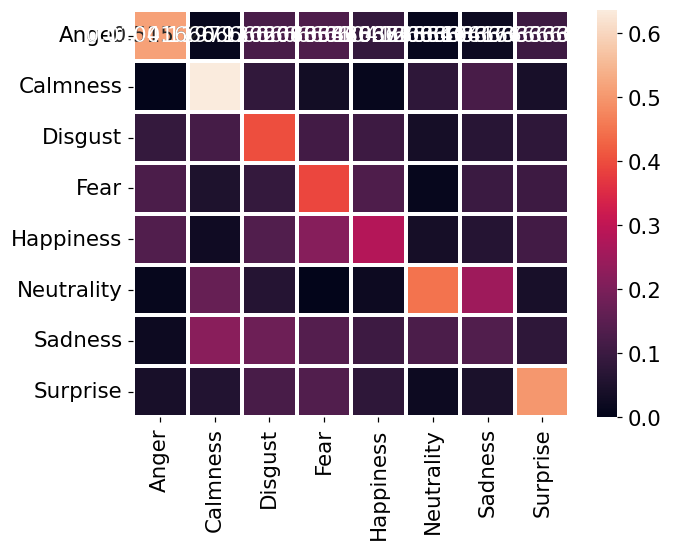

Saving confusion matrix with name:  ../../data/svm/confusion_matrix_SVM_rbf_neutral.jpg
We need to compute effective number of features


  0%|          | 1/306 [00:09<46:12,  9.09s/it]

Iter =  1  UAR = 0.5000


  3%|▎         | 8/306 [01:29<58:35, 11.80s/it]

Iter =  8  UAR = 0.5312


  3%|▎         | 9/306 [01:40<57:51, 11.69s/it]

Iter =  9  UAR = 0.5359


  3%|▎         | 10/306 [01:51<57:13, 11.60s/it]

Iter =  10  UAR = 0.5661


  4%|▎         | 11/306 [02:03<56:54, 11.57s/it]

Iter =  11  UAR = 0.5723


  4%|▍         | 12/306 [02:15<56:48, 11.59s/it]

Iter =  12  UAR = 0.6024


  4%|▍         | 13/306 [02:26<57:01, 11.68s/it]

Iter =  13  UAR = 0.6088


  5%|▍         | 14/306 [02:39<57:29, 11.81s/it]

Iter =  14  UAR = 0.6116


  5%|▍         | 15/306 [02:51<57:57, 11.95s/it]

Iter =  15  UAR = 0.6284


  7%|▋         | 20/306 [03:51<58:07, 12.19s/it]

Iter =  20  UAR = 0.6344


  8%|▊         | 24/306 [04:43<1:00:33, 12.89s/it]

Iter =  24  UAR = 0.6356


  8%|▊         | 25/306 [04:57<1:00:54, 13.01s/it]

Iter =  25  UAR = 0.6358


  8%|▊         | 26/306 [05:10<1:01:23, 13.15s/it]

Iter =  26  UAR = 0.6414


  9%|▉         | 27/306 [05:24<1:01:56, 13.32s/it]

Iter =  27  UAR = 0.6428


  9%|▉         | 29/306 [05:52<1:03:21, 13.72s/it]

Iter =  29  UAR = 0.6472


 10%|█         | 31/306 [06:21<1:04:50, 14.15s/it]

Iter =  31  UAR = 0.6498


 10%|█         | 32/306 [06:34<1:03:00, 13.80s/it]

Iter =  32  UAR = 0.6587


 14%|█▍        | 44/306 [09:26<1:05:15, 14.94s/it]

Iter =  44  UAR = 0.6589


 16%|█▌        | 49/306 [12:53<3:27:41, 48.49s/it]

Iter =  49  UAR = 0.6645


 16%|█▋        | 50/306 [13:08<2:44:00, 38.44s/it]

Iter =  50  UAR = 0.6663


 17%|█▋        | 52/306 [13:39<1:52:52, 26.66s/it]

Iter =  52  UAR = 0.6667


 18%|█▊        | 54/306 [14:11<1:28:38, 21.11s/it]

Iter =  54  UAR = 0.6707


 18%|█▊        | 55/306 [14:27<1:22:00, 19.61s/it]

Iter =  55  UAR = 0.6775


 23%|██▎       | 70/306 [20:06<2:47:32, 42.59s/it]

Iter =  70  UAR = 0.6781


100%|██████████| 306/306 [2:26:52<00:00, 28.80s/it]  


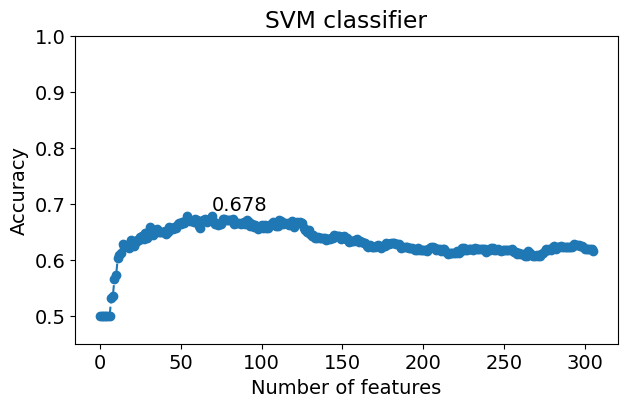

auc_best = 0.67808494
best auc (SVM) =  0.6780849358974359 Number of features =  69
NEW ROUND
Iter #2: 0.680 <-> 0.678
Iter #3: 0.678 <-> 0.678
Iter #26: 0.679 <-> 0.678
Iter #29: 0.678 <-> 0.678
Iter #42: 0.679 <-> 0.678
Iter #48: 0.678 <-> 0.678
Iter #49: 0.678 <-> 0.678
Iter #50: 0.678 <-> 0.678
Iter #51: 0.678 <-> 0.678
Iter #52: 0.678 <-> 0.678
Iter #66: 0.682 <-> 0.678
Withdraw feature #66, added accracy 0.0042067307692307265
NEW ROUND
Iter #0: 0.683 <-> 0.682
Iter #7: 0.686 <-> 0.682
Iter #15: 0.683 <-> 0.682
Iter #16: 0.683 <-> 0.682
Iter #17: 0.683 <-> 0.682
Iter #18: 0.683 <-> 0.682
Iter #19: 0.683 <-> 0.682
Iter #25: 0.683 <-> 0.682
Iter #27: 0.684 <-> 0.682
Iter #48: 0.682 <-> 0.682
Withdraw feature #7, added accracy 0.003405448717948789
NEW ROUND
Iter #3: 0.686 <-> 0.686
Iter #14: 0.686 <-> 0.686
Iter #15: 0.686 <-> 0.686
Iter #16: 0.686 <-> 0.686
Iter #17: 0.686 <-> 0.686
Iter #18: 0.686 <-> 0.686
Withdraw feature #3, added accracy 0.0008012820512820484
NEW ROUND
Iter #0:

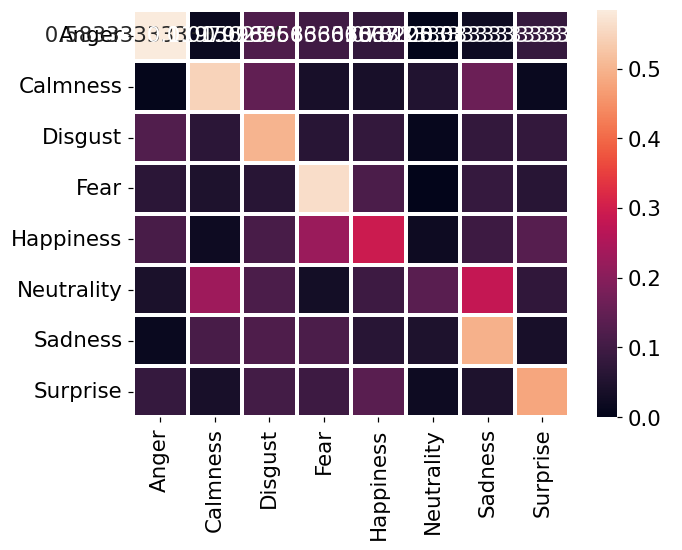

Saving confusion matrix with name:  ../../data/svm/confusion_matrix_SVM_rbf_sad.jpg
We need to compute effective number of features


  0%|          | 1/306 [00:08<45:38,  8.98s/it]

Iter =  1  UAR = 0.5000


  2%|▏         | 5/306 [00:47<48:01,  9.57s/it]

Iter =  5  UAR = 0.5994


  2%|▏         | 6/306 [00:57<48:21,  9.67s/it]

Iter =  6  UAR = 0.6484


  2%|▏         | 7/306 [01:07<48:41,  9.77s/it]

Iter =  7  UAR = 0.6488


  3%|▎         | 9/306 [01:27<49:38, 10.03s/it]

Iter =  9  UAR = 0.6526


  3%|▎         | 10/306 [01:38<50:11, 10.17s/it]

Iter =  10  UAR = 0.6534


  4%|▎         | 11/306 [01:48<50:43, 10.32s/it]

Iter =  11  UAR = 0.6579


  4%|▍         | 12/306 [01:59<51:33, 10.52s/it]

Iter =  12  UAR = 0.6753


  5%|▍         | 14/306 [02:22<53:05, 10.91s/it]

Iter =  14  UAR = 0.6913


  7%|▋         | 21/306 [03:40<53:51, 11.34s/it]

Iter =  21  UAR = 0.6929


  7%|▋         | 22/306 [03:52<54:24, 11.49s/it]

Iter =  22  UAR = 0.7059


  8%|▊         | 24/306 [04:16<55:12, 11.75s/it]

Iter =  24  UAR = 0.7324


 12%|█▏        | 37/306 [06:58<55:27, 12.37s/it]

Iter =  37  UAR = 0.7408


 12%|█▏        | 38/306 [07:10<55:44, 12.48s/it]

Iter =  38  UAR = 0.7410


 16%|█▋        | 50/306 [11:47<2:25:35, 34.12s/it]

Iter =  50  UAR = 0.7562


 26%|██▌       | 79/306 [21:36<1:12:03, 19.05s/it]

Iter =  79  UAR = 0.7602


 31%|███       | 94/306 [25:50<1:04:17, 18.20s/it]

Iter =  94  UAR = 0.7640


 35%|███▍      | 106/306 [29:27<1:02:29, 18.75s/it]

Iter =  106  UAR = 0.7654


 36%|███▋      | 111/306 [33:35<3:06:47, 57.47s/it]

Iter =  111  UAR = 0.7662


 37%|███▋      | 112/306 [33:53<2:28:00, 45.78s/it]

Iter =  112  UAR = 0.7684


 37%|███▋      | 113/306 [34:12<2:01:14, 37.69s/it]

Iter =  113  UAR = 0.7710


100%|██████████| 306/306 [2:10:08<00:00, 25.52s/it]


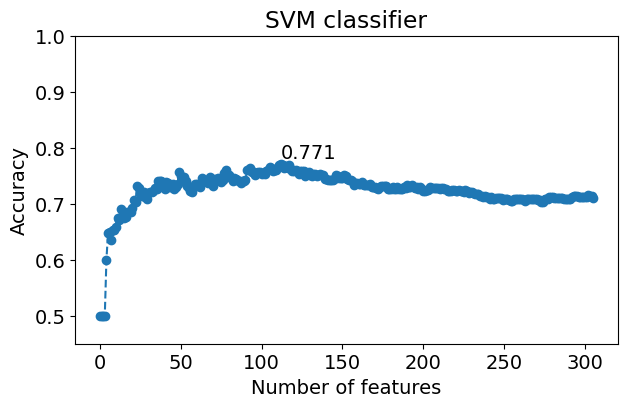

auc_best = 0.77103365
best auc (SVM) =  0.7710336538461539 Number of features =  112
NEW ROUND
Iter #0: 0.771 <-> 0.771
Iter #1: 0.771 <-> 0.771
Iter #2: 0.771 <-> 0.771
Iter #3: 0.771 <-> 0.771
Iter #4: 0.774 <-> 0.771
Iter #6: 0.771 <-> 0.771
Iter #7: 0.774 <-> 0.771
Iter #8: 0.771 <-> 0.771
Iter #9: 0.771 <-> 0.771
Iter #10: 0.771 <-> 0.771
Iter #11: 0.771 <-> 0.771
Iter #12: 0.771 <-> 0.771
Iter #19: 0.771 <-> 0.771
Iter #20: 0.771 <-> 0.771
Iter #22: 0.771 <-> 0.771
Iter #24: 0.771 <-> 0.771
Iter #28: 0.774 <-> 0.771
Iter #30: 0.771 <-> 0.771
Iter #36: 0.773 <-> 0.771
Iter #37: 0.774 <-> 0.771
Iter #38: 0.771 <-> 0.771
Iter #41: 0.773 <-> 0.771
Iter #45: 0.771 <-> 0.771
Iter #46: 0.775 <-> 0.771
Iter #48: 0.771 <-> 0.771
Iter #50: 0.771 <-> 0.771
Iter #52: 0.773 <-> 0.771
Iter #53: 0.772 <-> 0.771
Iter #54: 0.772 <-> 0.771
Iter #55: 0.773 <-> 0.771
Iter #57: 0.771 <-> 0.771
Iter #58: 0.773 <-> 0.771
Iter #61: 0.774 <-> 0.771
Iter #65: 0.771 <-> 0.771
Iter #66: 0.774 <-> 0.771
Iter

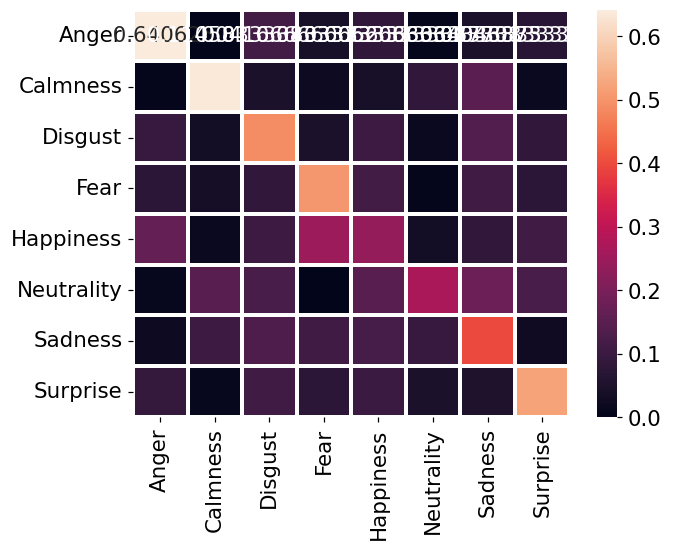

Saving confusion matrix with name:  ../../data/svm/confusion_matrix_SVM_rbf_calm.jpg
We need to compute effective number of features


  0%|          | 1/306 [00:09<46:55,  9.23s/it]

Iter =  1  UAR = 0.5088


  1%|          | 2/306 [00:19<48:30,  9.57s/it]

Iter =  2  UAR = 0.5100


  1%|          | 3/306 [00:29<49:16,  9.76s/it]

Iter =  3  UAR = 0.5493


  1%|▏         | 4/306 [00:39<49:48,  9.90s/it]

Iter =  4  UAR = 0.5521


  2%|▏         | 5/306 [00:49<49:50,  9.93s/it]

Iter =  5  UAR = 0.6140


  2%|▏         | 7/306 [01:09<50:20, 10.10s/it]

Iter =  7  UAR = 0.6348


  3%|▎         | 8/306 [01:19<50:34, 10.18s/it]

Iter =  8  UAR = 0.6765


  4%|▎         | 11/306 [01:52<51:59, 10.58s/it]

Iter =  11  UAR = 0.6939


  4%|▍         | 13/306 [02:14<53:35, 10.97s/it]

Iter =  13  UAR = 0.6969


  5%|▍         | 15/306 [02:38<54:53, 11.32s/it]

Iter =  15  UAR = 0.7001


  6%|▌         | 17/306 [03:00<54:14, 11.26s/it]

Iter =  17  UAR = 0.7021


  6%|▌         | 18/306 [03:11<54:20, 11.32s/it]

Iter =  18  UAR = 0.7059


  7%|▋         | 22/306 [03:59<56:18, 11.90s/it]

Iter =  22  UAR = 0.7151


  8%|▊         | 25/306 [04:37<57:29, 12.28s/it]

Iter =  25  UAR = 0.7256


 16%|█▋        | 50/306 [14:27<2:39:07, 37.30s/it]

Iter =  50  UAR = 0.7272


 17%|█▋        | 52/306 [14:56<1:49:13, 25.80s/it]

Iter =  52  UAR = 0.7300


 17%|█▋        | 53/306 [15:11<1:35:15, 22.59s/it]

Iter =  53  UAR = 0.7348


 18%|█▊        | 55/306 [15:42<1:19:17, 18.95s/it]

Iter =  55  UAR = 0.7356


 18%|█▊        | 56/306 [15:58<1:14:47, 17.95s/it]

Iter =  56  UAR = 0.7378


100%|██████████| 306/306 [2:18:42<00:00, 27.20s/it]  


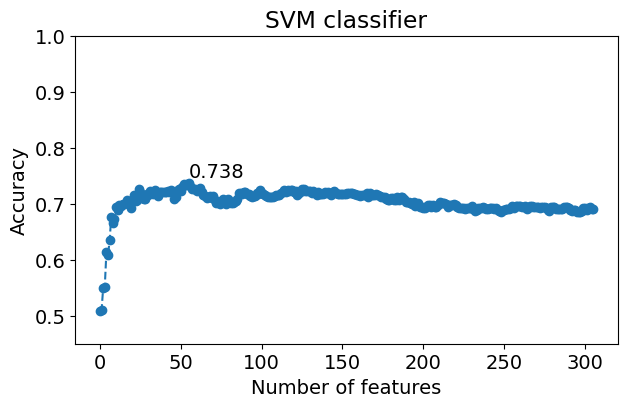

auc_best = 0.73778045
best auc (SVM) =  0.7377804487179487 Number of features =  55
NEW ROUND
Iter #4: 0.741 <-> 0.738
Iter #14: 0.742 <-> 0.738
Iter #19: 0.739 <-> 0.738
Iter #22: 0.742 <-> 0.738
Iter #26: 0.741 <-> 0.738
Iter #28: 0.739 <-> 0.738
Iter #30: 0.740 <-> 0.738
Iter #41: 0.739 <-> 0.738
Iter #46: 0.738 <-> 0.738
Iter #50: 0.739 <-> 0.738
Withdraw feature #14, added accracy 0.004607371794871806
NEW ROUND
Iter #5: 0.745 <-> 0.742
Iter #6: 0.742 <-> 0.742
Iter #8: 0.744 <-> 0.742
Iter #16: 0.745 <-> 0.742
Iter #22: 0.744 <-> 0.742
Iter #34: 0.746 <-> 0.742
Iter #37: 0.745 <-> 0.742
Iter #47: 0.745 <-> 0.742
Withdraw feature #34, added accracy 0.003405448717948678
NEW ROUND
Iter #16: 0.751 <-> 0.746
Iter #30: 0.747 <-> 0.746
Iter #44: 0.748 <-> 0.746
Iter #46: 0.748 <-> 0.746
Iter #47: 0.748 <-> 0.746
Withdraw feature #16, added accracy 0.004807692307692402
NEW ROUND
Iter #0: 0.754 <-> 0.751
Iter #21: 0.751 <-> 0.751
Iter #39: 0.751 <-> 0.751
Iter #45: 0.751 <-> 0.751
Withdraw

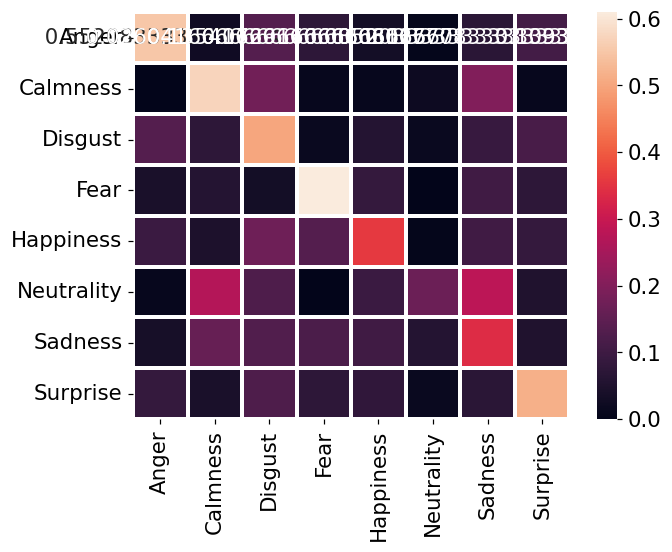

Saving confusion matrix with name:  ../../data/svm/confusion_matrix_SVM_rbf_fear.jpg
We need to compute effective number of features


  0%|          | 1/306 [00:09<46:10,  9.08s/it]

Iter =  1  UAR = 0.5000


  1%|▏         | 4/306 [00:41<54:17, 10.79s/it]

Iter =  4  UAR = 0.5052


  2%|▏         | 5/306 [00:53<55:37, 11.09s/it]

Iter =  5  UAR = 0.5060


  2%|▏         | 6/306 [01:04<55:52, 11.18s/it]

Iter =  6  UAR = 0.5144


  2%|▏         | 7/306 [01:15<55:47, 11.20s/it]

Iter =  7  UAR = 0.5421


  3%|▎         | 8/306 [01:27<55:31, 11.18s/it]

Iter =  8  UAR = 0.5723


  3%|▎         | 9/306 [01:38<55:34, 11.23s/it]

Iter =  9  UAR = 0.5739


  3%|▎         | 10/306 [01:49<55:33, 11.26s/it]

Iter =  10  UAR = 0.6066


  4%|▎         | 11/306 [02:01<55:51, 11.36s/it]

Iter =  11  UAR = 0.6088


  4%|▍         | 13/306 [02:25<57:11, 11.71s/it]

Iter =  13  UAR = 0.6280


  5%|▍         | 15/306 [02:49<58:02, 11.97s/it]

Iter =  15  UAR = 0.6446


  6%|▌         | 19/306 [03:37<56:49, 11.88s/it]

Iter =  19  UAR = 0.6546


  7%|▋         | 20/306 [03:49<57:02, 11.97s/it]

Iter =  20  UAR = 0.6639


  8%|▊         | 23/306 [04:27<58:43, 12.45s/it]

Iter =  23  UAR = 0.6673


  8%|▊         | 24/306 [04:39<59:02, 12.56s/it]

Iter =  24  UAR = 0.6675


  8%|▊         | 25/306 [04:52<59:21, 12.67s/it]

Iter =  25  UAR = 0.6763


  8%|▊         | 26/306 [05:05<59:42, 12.79s/it]

Iter =  26  UAR = 0.6829


  9%|▉         | 27/306 [05:19<1:00:10, 12.94s/it]

Iter =  27  UAR = 0.6891


  9%|▉         | 29/306 [05:46<1:01:31, 13.33s/it]

Iter =  29  UAR = 0.7029


 15%|█▌        | 46/306 [09:43<1:04:16, 14.83s/it]

Iter =  46  UAR = 0.7099


 32%|███▏      | 99/306 [27:23<1:08:03, 19.73s/it]

Iter =  99  UAR = 0.7113


 34%|███▎      | 103/306 [28:45<1:09:16, 20.47s/it]

Iter =  103  UAR = 0.7159


 35%|███▍      | 106/306 [29:50<1:10:56, 21.28s/it]

Iter =  106  UAR = 0.7185


100%|██████████| 306/306 [2:18:17<00:00, 27.12s/it]  


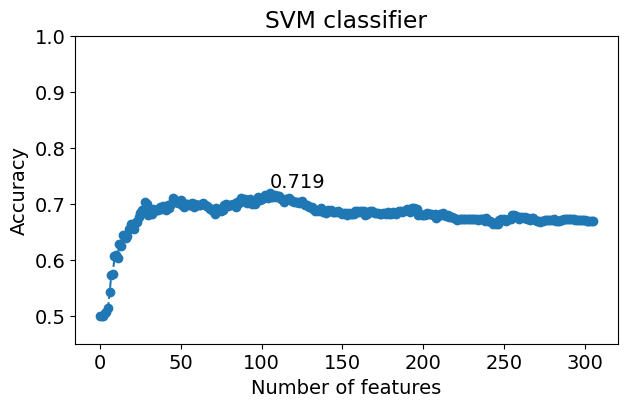

auc_best = 0.71854968
best auc (SVM) =  0.7185496794871795 Number of features =  105
NEW ROUND
Iter #8: 0.719 <-> 0.719
Iter #19: 0.721 <-> 0.719
Iter #27: 0.719 <-> 0.719
Iter #29: 0.719 <-> 0.719
Iter #48: 0.719 <-> 0.719
Iter #99: 0.719 <-> 0.719
Withdraw feature #19, added accracy 0.0024038461538461453
NEW ROUND
Iter #3: 0.722 <-> 0.721
Iter #7: 0.721 <-> 0.721
Iter #40: 0.724 <-> 0.721
Iter #44: 0.722 <-> 0.721
Iter #47: 0.721 <-> 0.721
Iter #48: 0.721 <-> 0.721
Iter #49: 0.721 <-> 0.721
Iter #50: 0.721 <-> 0.721
Iter #51: 0.721 <-> 0.721
Iter #63: 0.721 <-> 0.721
Iter #69: 0.722 <-> 0.721
Iter #76: 0.721 <-> 0.721
Iter #77: 0.728 <-> 0.721
Iter #82: 0.721 <-> 0.721
Iter #83: 0.728 <-> 0.721
Iter #94: 0.724 <-> 0.721
Iter #100: 0.721 <-> 0.721
Withdraw feature #83, added accracy 0.006810897435897467
NEW ROUND
Iter #10: 0.728 <-> 0.728
Iter #47: 0.728 <-> 0.728
Iter #48: 0.728 <-> 0.728
Iter #49: 0.728 <-> 0.728
Iter #50: 0.728 <-> 0.728
Iter #51: 0.728 <-> 0.728
Iter #63: 0.728 <-

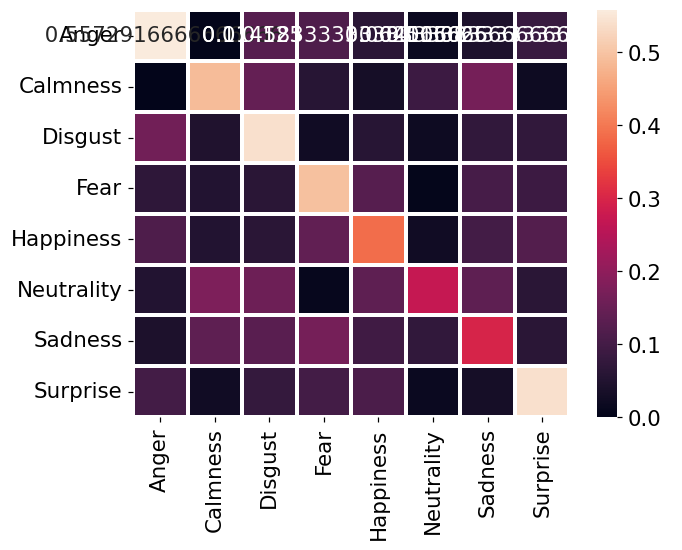

Saving confusion matrix with name:  ../../data/svm/confusion_matrix_SVM_rbf_disgust.jpg
We need to compute effective number of features


  0%|          | 1/306 [00:09<46:09,  9.08s/it]

Iter =  1  UAR = 0.5000


  2%|▏         | 6/306 [00:59<51:40, 10.33s/it]

Iter =  6  UAR = 0.5132


  2%|▏         | 7/306 [01:10<52:16, 10.49s/it]

Iter =  7  UAR = 0.5447


  3%|▎         | 8/306 [01:21<52:47, 10.63s/it]

Iter =  8  UAR = 0.5535


  3%|▎         | 9/306 [01:32<53:13, 10.75s/it]

Iter =  9  UAR = 0.5727


  3%|▎         | 10/306 [01:43<53:49, 10.91s/it]

Iter =  10  UAR = 0.5779


  4%|▎         | 11/306 [01:54<54:12, 11.03s/it]

Iter =  11  UAR = 0.5944


  4%|▍         | 12/306 [02:06<54:53, 11.20s/it]

Iter =  12  UAR = 0.5996


  4%|▍         | 13/306 [02:18<55:38, 11.39s/it]

Iter =  13  UAR = 0.6052


  5%|▍         | 14/306 [02:30<56:00, 11.51s/it]

Iter =  14  UAR = 0.6308


  5%|▍         | 15/306 [02:42<56:27, 11.64s/it]

Iter =  15  UAR = 0.6444


  6%|▌         | 17/306 [03:04<55:29, 11.52s/it]

Iter =  17  UAR = 0.6500


  6%|▌         | 18/306 [03:16<55:29, 11.56s/it]

Iter =  18  UAR = 0.6506


  6%|▌         | 19/306 [03:28<55:39, 11.64s/it]

Iter =  19  UAR = 0.6663


  7%|▋         | 20/306 [03:40<56:04, 11.76s/it]

Iter =  20  UAR = 0.6665


  7%|▋         | 21/306 [03:52<56:28, 11.89s/it]

Iter =  21  UAR = 0.6707


  8%|▊         | 23/306 [04:17<57:42, 12.24s/it]

Iter =  23  UAR = 0.6789


  8%|▊         | 24/306 [04:30<57:49, 12.30s/it]

Iter =  24  UAR = 0.6921


  8%|▊         | 26/306 [04:55<58:25, 12.52s/it]

Iter =  26  UAR = 0.6969


  9%|▉         | 27/306 [05:08<58:50, 12.65s/it]

Iter =  27  UAR = 0.7206


  9%|▉         | 28/306 [05:21<59:25, 12.82s/it]

Iter =  28  UAR = 0.7250


 10%|▉         | 30/306 [05:48<1:00:32, 13.16s/it]

Iter =  30  UAR = 0.7282


 10%|█         | 31/306 [06:02<1:01:06, 13.33s/it]

Iter =  31  UAR = 0.7462


 10%|█         | 32/306 [06:14<59:14, 12.97s/it]  

Iter =  32  UAR = 0.7574


 14%|█▎        | 42/306 [08:26<59:36, 13.55s/it]

Iter =  42  UAR = 0.7594


 14%|█▍        | 43/306 [08:40<1:00:00, 13.69s/it]

Iter =  43  UAR = 0.7626


 14%|█▍        | 44/306 [08:54<1:00:33, 13.87s/it]

Iter =  44  UAR = 0.7658


 16%|█▌        | 48/306 [10:52<2:18:44, 32.27s/it]

Iter =  48  UAR = 0.7740


 16%|█▌        | 49/306 [12:06<3:12:23, 44.92s/it]

Iter =  49  UAR = 0.7788


 17%|█▋        | 53/306 [13:03<1:31:17, 21.65s/it]

Iter =  53  UAR = 0.7806


 18%|█▊        | 55/306 [13:33<1:15:59, 18.16s/it]

Iter =  55  UAR = 0.7815


 19%|█▊        | 57/306 [14:03<1:08:56, 16.61s/it]

Iter =  57  UAR = 0.7847


 19%|█▉        | 58/306 [14:18<1:07:18, 16.28s/it]

Iter =  58  UAR = 0.7873


 19%|█▉        | 59/306 [14:34<1:06:21, 16.12s/it]

Iter =  59  UAR = 0.7903


 20%|██        | 62/306 [15:23<1:05:59, 16.23s/it]

Iter =  62  UAR = 0.7921


 21%|██        | 63/306 [15:40<1:06:25, 16.40s/it]

Iter =  63  UAR = 0.7973


100%|██████████| 306/306 [2:11:38<00:00, 25.81s/it]


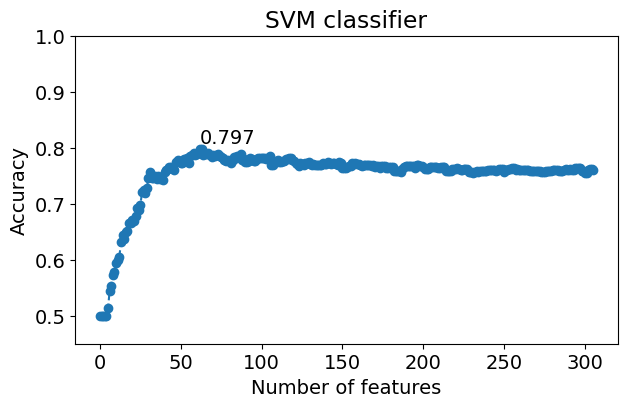

auc_best = 0.79727564
best auc (SVM) =  0.797275641025641 Number of features =  62
NEW ROUND
Iter #0: 0.797 <-> 0.797
Iter #1: 0.797 <-> 0.797
Iter #2: 0.797 <-> 0.797
Iter #3: 0.797 <-> 0.797
Iter #9: 0.797 <-> 0.797
Iter #17: 0.798 <-> 0.797
Iter #21: 0.797 <-> 0.797
Iter #36: 0.798 <-> 0.797
Iter #40: 0.798 <-> 0.797
Iter #49: 0.802 <-> 0.797
Iter #54: 0.797 <-> 0.797
Iter #57: 0.798 <-> 0.797
Withdraw feature #49, added accracy 0.004407051282051322
NEW ROUND


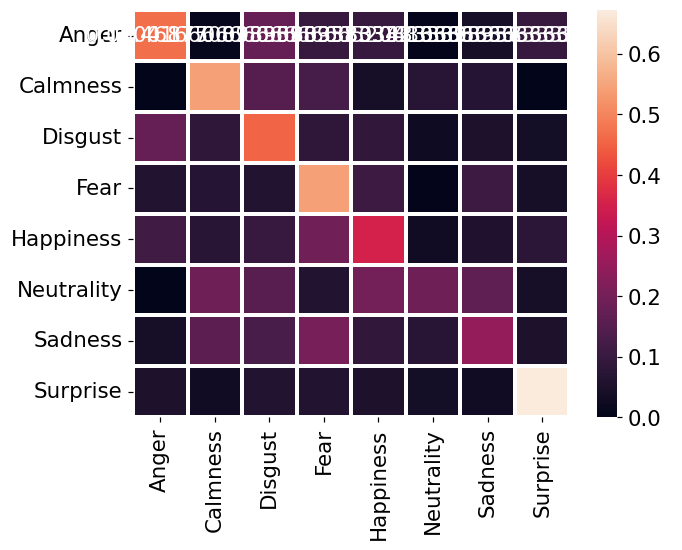

Saving confusion matrix with name:  ../../data/svm/confusion_matrix_SVM_rbf_surprised.jpg
We need to compute effective number of features


  0%|          | 1/306 [00:09<47:24,  9.33s/it]

Iter =  1  UAR = 0.5206


  1%|          | 2/306 [00:19<48:18,  9.54s/it]

Iter =  2  UAR = 0.6030


  1%|          | 3/306 [00:29<49:27,  9.79s/it]

Iter =  3  UAR = 0.6100


  2%|▏         | 5/306 [00:49<50:57, 10.16s/it]

Iter =  5  UAR = 0.6126


  2%|▏         | 6/306 [00:59<50:41, 10.14s/it]

Iter =  6  UAR = 0.6895


  2%|▏         | 7/306 [01:10<50:44, 10.18s/it]

Iter =  7  UAR = 0.6943


  3%|▎         | 9/306 [01:31<51:09, 10.34s/it]

Iter =  9  UAR = 0.7228


  4%|▍         | 13/306 [02:15<53:18, 10.92s/it]

Iter =  13  UAR = 0.7288


  5%|▍         | 14/306 [02:26<53:48, 11.06s/it]

Iter =  14  UAR = 0.7366


  5%|▍         | 15/306 [02:38<54:14, 11.18s/it]

Iter =  15  UAR = 0.7390


  5%|▌         | 16/306 [02:48<53:37, 11.09s/it]

Iter =  16  UAR = 0.7428


  6%|▌         | 17/306 [02:59<53:12, 11.05s/it]

Iter =  17  UAR = 0.7498


  6%|▌         | 18/306 [03:10<53:04, 11.06s/it]

Iter =  18  UAR = 0.7508


  6%|▌         | 19/306 [03:22<53:16, 11.14s/it]

Iter =  19  UAR = 0.7512


  7%|▋         | 21/306 [03:45<53:53, 11.34s/it]

Iter =  21  UAR = 0.7532


  7%|▋         | 22/306 [03:57<54:26, 11.50s/it]

Iter =  22  UAR = 0.7552


  8%|▊         | 23/306 [04:09<55:00, 11.66s/it]

Iter =  23  UAR = 0.7576


  8%|▊         | 24/306 [04:21<55:10, 11.74s/it]

Iter =  24  UAR = 0.7640


  8%|▊         | 25/306 [04:33<55:29, 11.85s/it]

Iter =  25  UAR = 0.7656


  9%|▉         | 28/306 [05:10<56:48, 12.26s/it]

Iter =  28  UAR = 0.7734


 11%|█         | 33/306 [06:13<56:09, 12.34s/it]

Iter =  33  UAR = 0.7746


 11%|█▏        | 35/306 [06:37<55:34, 12.30s/it]

Iter =  35  UAR = 0.7754


 12%|█▏        | 36/306 [06:50<55:36, 12.36s/it]

Iter =  36  UAR = 0.7821


 13%|█▎        | 40/306 [07:42<57:02, 12.87s/it]

Iter =  40  UAR = 0.7905


 17%|█▋        | 51/306 [12:13<2:01:37, 28.62s/it]

Iter =  51  UAR = 0.7967


 17%|█▋        | 53/306 [12:41<1:29:54, 21.32s/it]

Iter =  53  UAR = 0.8085


 18%|█▊        | 54/306 [12:56<1:20:57, 19.28s/it]

Iter =  54  UAR = 0.8105


100%|██████████| 306/306 [2:11:44<00:00, 25.83s/it]


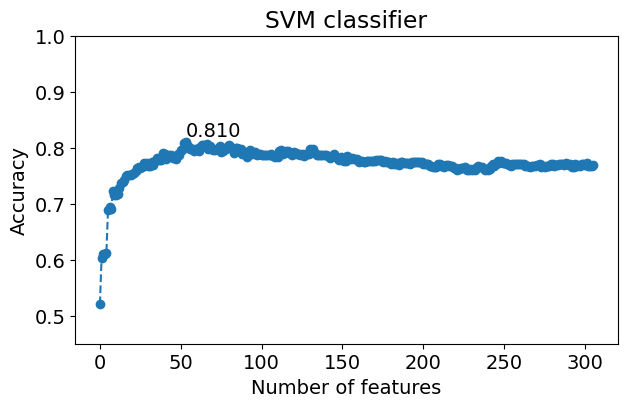

auc_best = 0.81049679
best auc (SVM) =  0.8104967948717949 Number of features =  53
NEW ROUND
Iter #0: 0.811 <-> 0.810
Iter #1: 0.811 <-> 0.810
Iter #2: 0.811 <-> 0.810
Iter #3: 0.811 <-> 0.810
Iter #4: 0.811 <-> 0.810
Iter #7: 0.811 <-> 0.810
Iter #21: 0.812 <-> 0.810
Iter #29: 0.811 <-> 0.810
Iter #31: 0.817 <-> 0.810
Withdraw feature #31, added accracy 0.0064102564102563875
NEW ROUND
Iter #0: 0.817 <-> 0.817
Iter #5: 0.820 <-> 0.817
Iter #8: 0.818 <-> 0.817
Iter #11: 0.822 <-> 0.817
Iter #12: 0.818 <-> 0.817
Iter #13: 0.818 <-> 0.817
Iter #14: 0.817 <-> 0.817
Iter #15: 0.822 <-> 0.817
Iter #17: 0.817 <-> 0.817
Iter #18: 0.817 <-> 0.817
Iter #19: 0.817 <-> 0.817
Iter #20: 0.817 <-> 0.817
Iter #21: 0.817 <-> 0.817
Iter #22: 0.820 <-> 0.817
Iter #27: 0.817 <-> 0.817
Iter #28: 0.817 <-> 0.817
Iter #29: 0.817 <-> 0.817
Iter #30: 0.817 <-> 0.817
Iter #31: 0.817 <-> 0.817
Iter #43: 0.820 <-> 0.817
Withdraw feature #11, added accracy 0.005208333333333259
NEW ROUND
Iter #5: 0.826 <-> 0.822
I

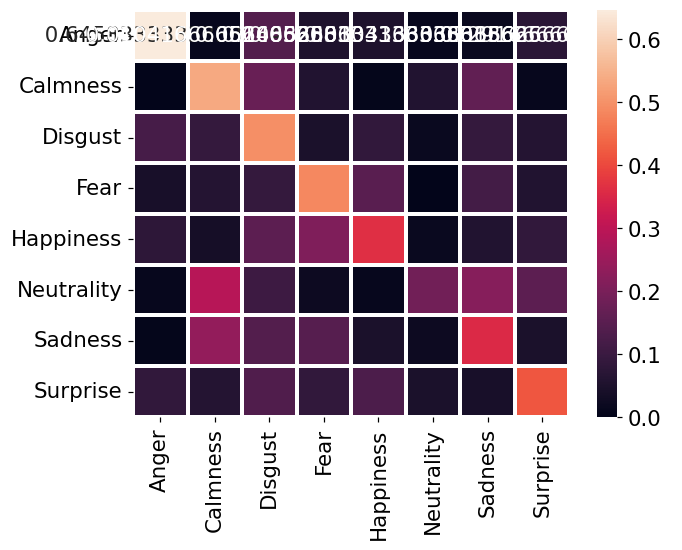

Saving confusion matrix with name:  ../../data/svm/confusion_matrix_SVM_rbf_angry.jpg


In [7]:
emotions = ['happy', 'neutral', 'sad', 'calm', 'fear', 'disgust', 'surprised', 'angry']

for emotion_label in emotions:
    # Relabeling and normilizing
    y_true = np.zeros((len(y)))
    y_true[np.squeeze(y.values==emotion_label)] = 1
    y_true[y_true==0] = -1

    X_data = X.values
    X_norm = (X_data - X_data.mean(axis=0)) / X_data.std(axis=0)
    y_reg = copy.copy(y_true)

    try:
        Rank = np.load(f'../../data/svm/Lasso_Ranking_SVM_rbf_{emotion_label}_result.npy')
    except:
        print("We need to compute LASSO ranking")

        # LASSO ranking
        Lasso_model = linear_model.Lasso()
        Npt = 200
        coeffs = np.zeros((X_norm.shape[1],Npt))
        lambda_ = np.logspace(-12.5, 0.3, Npt)
        i = 0
        for lamb in tqdm(lambda_):
            Lasso_model = linear_model.Lasso(alpha=lamb, max_iter=20000)
            Lasso_model.fit(X_norm,y_reg)
            coeffs[:,i] = Lasso_model.coef_
            i = i + 1

        plt.figure(dpi=110)
        plt.plot(coeffs.T)
        plt.xlabel('$\lambda$ number')
        plt.ylabel('Coeffs')
        plt.show()    

        Rank_lasso = []
        for i in range(coeffs.shape[1]-1,-1,-1):
            withdraw_features = np.nonzero(coeffs[:,i])[0];
            something_new = np.setdiff1d(withdraw_features, Rank_lasso)
            if len(something_new):
                for ii in range(len(something_new)):
                    Rank_lasso.append(something_new[ii])
    
        np.save(f'../../data/svm/Lasso_Ranking_SVM_rbf_{emotion_label}_result.npy', Rank_lasso)    # .npy extension is added if not given
        Rank = np.load(f'../../data/svm/Lasso_Ranking_SVM_rbf_{emotion_label}_result.npy')

    # LOSO accuracy estimation
    try:
        auc_svm = np.load(f'../../data/svm/feature_SVM_rbf_uar_total_{emotion_label}.npy')       
    except:
        print("We need to compute effective number of features")        
        auc_svm = []
        auc_best = 0
        ind_best = 0
        for k in tqdm(range(1,len(Rank)+1)):
            feature_inds = Rank[:k]
            auc,_,_,_,_ = SVM_RBF_eval(X,pd.DataFrame(y_reg), feature_inds, ID)    
            auc_svm.append(auc)
            if (auc>auc_best):
                auc_best = auc
                ind_best = k-1
                print('Iter = ', k, f' UAR = {auc:.4f}' )
        
        fig,ax=plt.subplots(figsize=(7,4),dpi=100)
        plt.rcParams.update({'font.size': 14})
        plt.plot(auc_svm,marker='o', linestyle='dashed')
        plt.text(ind_best, auc_best+0.01, f'{auc_best:.3f}')
        plt.xlabel('Number of features')
        plt.ylabel('Accuracy')
        plt.title('SVM classifier')
        plt.ylim([0.45, 1.00])
        plt.show()
        
        print(f'auc_best = {auc_best:.8f}')
        print('best auc (SVM) = ', np.max(auc_svm), 'Number of features = ', np.argmax(auc_svm))

        np.save(f'../../data/svm/feature_SVM_rbf_uar_total_{emotion_label}.npy', auc_svm)    # .npy extension is added if not given
        auc_svm = np.load(f'../../data/svm/feature_SVM_rbf_uar_total_{emotion_label}.npy')
        
    try:        
        feature_ind = np.load(f'../../data/svm/feature_SVM_rbf_idx_{emotion_label}.npy')
    except:
        # Backward step selection
        ind_best = np.argmax(auc_svm)
        [acc_final, feature_ind, y_pred, y_true] = back_step_selection_svm_rbf(X, pd.DataFrame(y_reg), Rank[:ind_best+1], ID)
        np.save(f'../../data/svm/feature_SVM_rbf_idx_{emotion_label}.npy', feature_ind)    # .npy extension is added if not given
        feature_ind = np.load(f'../../data/svm/feature_SVM_rbf_idx_{emotion_label}.npy')
    
    # Results of 5-fold CV (selected feature space)
    acc_mu_curr,_,_,y_pred,y_true = SVM_RBF_eval(X,y,feature_ind, ID)
    plotting_utils.plot_confusion_matrix_eng(y_true, y_pred,image_path=f'../../data/svm/confusion_matrix_SVM_rbf_{emotion_label}.jpg')


# 5-fold CV (full feature space)

In [10]:
group_members= data_loader.get_k_fold_group_member()
X_new = pd.DataFrame(X_norm)
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_new, y, ID, group_members)

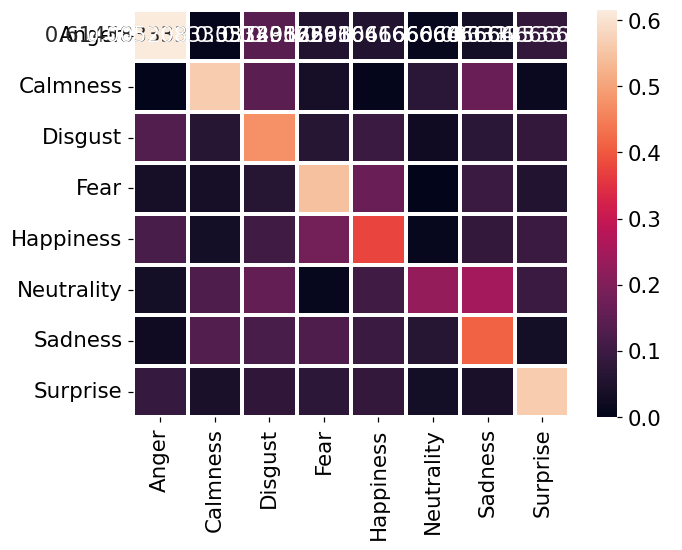

Saving confusion matrix with name:  ../../data/svm/confusion_matrix_SVM_rbf_all_features.jpg
UAR_best = 0.472, C_best = 3.511, gamma_best = 0.002


In [12]:
feature_ind = list(range(X.shape[1]))
UAR_best,C_best,gamma_best,y_pred,y_true = SVM_RBF_eval(X,y,feature_ind, ID)
plotting_utils.plot_confusion_matrix_eng(y_true, y_pred,image_path=f'../../data/svm/confusion_matrix_SVM_rbf_all_features.jpg')

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.3f}, gamma_best = {gamma_best:.3f}')    

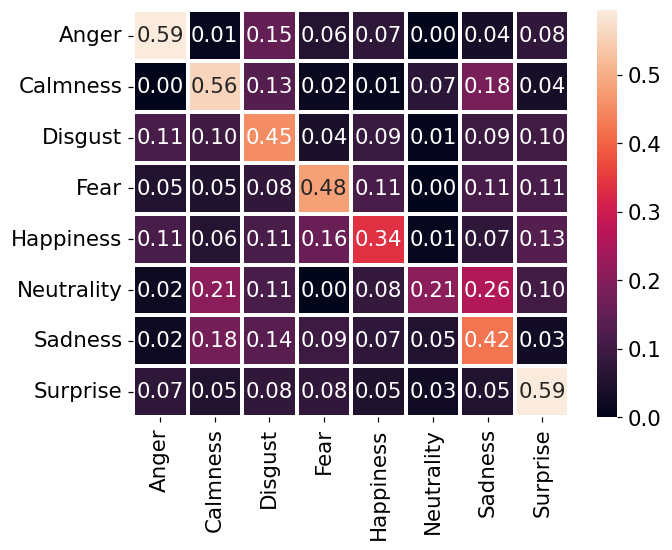

Saving confusion matrix with name:  confusion_matrix_SVM_full.jpg


In [14]:
# Confusion matrix
plotting_utils.plot_confusion_matrix_eng(y_true, y_pred,image_path=f'confusion_matrix_SVM_full.jpg')

# Joint subset of features

In [13]:
emotions = ['happy', 'neutral', 'sad', 'calm', 'fear', 'disgust', 'surprised', 'angry']
feature_joint_inds = []

for emotion_label in emotions:
    feature_ind = np.load(f'../../data/svm/feature_SVM_rbf_idx_{emotion_label}.npy')    
    feature_joint_inds = np.unique(np.concatenate((feature_joint_inds, feature_ind)))

feature_joint_inds = feature_joint_inds.astype(int)

In [14]:
group_members= data_loader.get_k_fold_group_member()
X_new = pd.DataFrame(X_norm[:,feature_joint_inds])
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_new, y, ID, group_members)

In [15]:
X_new.shape

(1440, 208)

In [16]:
UAR_best,C_best,gamma_best,y_pred,y_true = SVM_RBF_eval(X,y,feature_ind, ID)
plotting_utils.plot_confusion_matrix_eng(y_true, y_pred,image_path=f'../../data/svm/confusion_matrix_SVM_rbf_selected_features.jpg')

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.3f}, gamma_best = {gamma_best:.3f}')           

KeyboardInterrupt: 

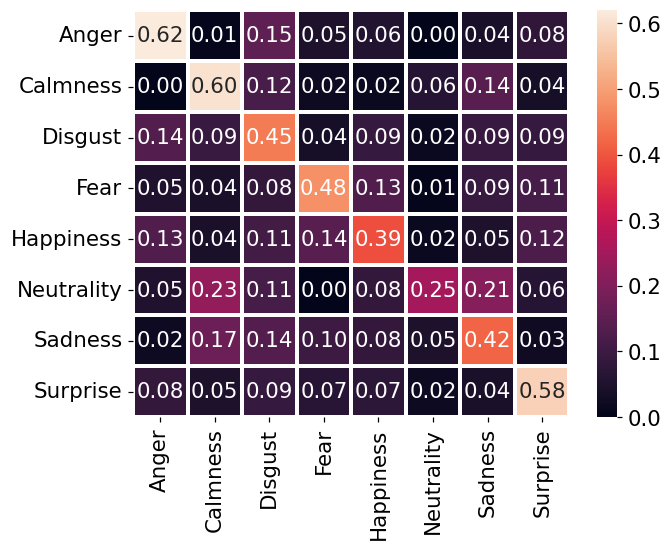

Saving confusion matrix with name:  confusion_matrix_SVM_joint_features.jpg


In [20]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred,image_path=f'confusion_matrix_SVM_joint_features.jpg')